In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\Finales\Final 25-11-2022\daily_weather_data.csv"

df = pd.read_csv(path, sep=",")
df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


In [23]:
# ver informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       324647 non-null  object 
 1   country    324647 non-null  object 
 2   city       324647 non-null  object 
 3   Latitude   324647 non-null  float64
 4   Longitude  324647 non-null  float64
 5   tavg       314963 non-null  float64
 6   tmin       312284 non-null  float64
 7   tmax       312269 non-null  float64
 8   wdir       283937 non-null  float64
 9   wspd       302400 non-null  float64
 10  pres       289416 non-null  float64
dtypes: float64(8), object(3)
memory usage: 27.2+ MB


In [22]:
# ver tipo de atributos
df.dtypes

date          object
country       object
city          object
Latitude     float64
Longitude    float64
tavg         float64
tmin         float64
tmax         float64
wdir         float64
wspd         float64
pres         float64
dtype: object

In [24]:
# Ver tamaño del datase
df.shape

(324647, 11)

In [3]:
# seleccionamos los faltantes, reemplazando los "?", utilizamos este metodo al encontrar missing values en Python.
faltantes =[]
# buscamos por columna
for column in df.columns:
    item = {}
    # igualamos las columnas
    item["column"] = column
    # pasamos a df el tipo como dato
    item["type"] = df[column].dtypes
    # sacamos el porcentaje de la columna faltante x 100
    item["percentage"] = np.mean(df[column] == "?")*100
    # sumamos la columna cantidad faltante
    item["quantity"] = np.sum(df[column] == "?")
    # agregamos los cambios
    faltantes.append(item)

# creamos el dataframe nuevo con pandas
faltantes_df = pd.DataFrame(faltantes)
# llamamos
faltantes_df

,column,type,percentage,quantity
0,date,object,0.0,0
1,country,object,0.0,0
2,city,object,0.0,0
3,Latitude,float64,0.0,0
4,Longitude,float64,0.0,0
5,tavg,float64,0.0,0
6,tmin,float64,0.0,0
7,tmax,float64,0.0,0
8,wdir,float64,0.0,0
9,wspd,float64,0.0,0


<AxesSubplot: >

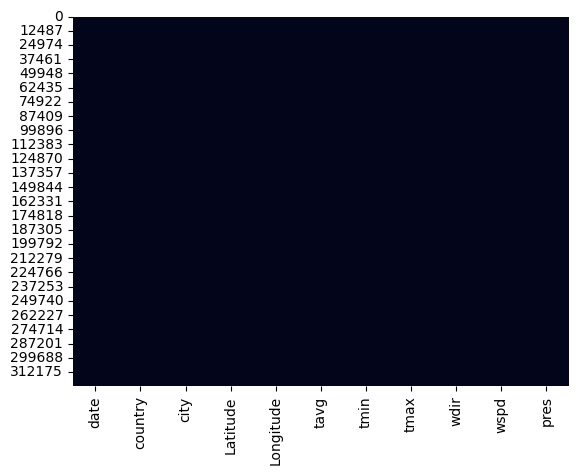

In [4]:
sns.heatmap(df.isin(['?']), cbar=False)

In [5]:
# agrupamos los datos faltantes que tenga porcentaje mayor a 0
missing_df = faltantes_df.loc[faltantes_df["percentage"] > 0]
missing_df

,column,type,percentage,quantity


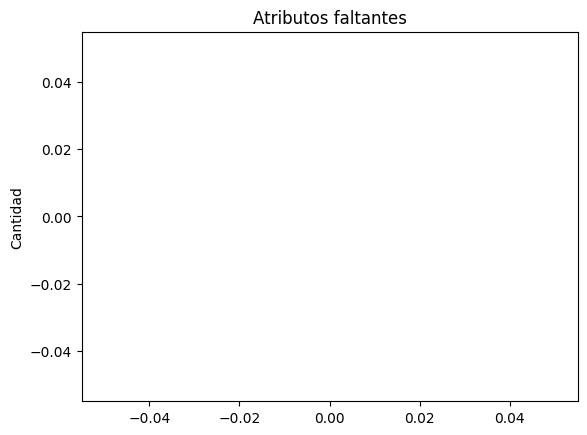

In [6]:
# Ordenar por cantidad descendente
faltantes_df = faltantes_df.sort_values('quantity', ascending=False)

# Filtrar por cantidad mayor a 0
df_fl_c = faltantes_df.loc[(faltantes_df['quantity'] > 0)]
# Graficar
plt.bar(df_fl_c["column"], df_fl_c["quantity"])
plt.ylabel('Cantidad')
plt.title('Atributos faltantes')
plt.show() 

En este caso no existen datos faltantes, por lo tanto, no se pueden agrupar por ningun dato.

In [11]:
# Analizo Outliers
df.describe()

,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
count,324647.000000,324647.000000,314963.000000,312284.000000,312269.000000,283937.000000,302400.000000,289416.000000
mean,19.557777,13.989870,21.023282,17.395555,25.042591,163.814931,13.320338,1013.275333
std,26.076725,76.541269,9.309077,9.384259,9.769574,101.923106,7.309672,7.166760
min,-54.430000,-176.176447,-33.800000,-39.300000,-27.300000,0.000000,0.000000,860.200000
25%,4.922420,-51.694138,15.600000,11.300000,19.800000,81.000000,8.100000,1009.900000
50%,18.067519,13.289437,25.000000,21.300000,28.600000,142.000000,11.600000,1012.900000
75%,41.902179,51.531040,27.500000,24.500000,31.200000,251.000000,16.900000,1016.800000
max,78.062000,179.198128,44.100000,38.500000,89.600000,360.000000,105.500000,1058.000000


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Latitude      36.979759
Longitude    103.225178
tavg          11.900000
tmin          13.200000
tmax          11.400000
wdir         170.000000
wspd           8.800000
pres           6.900000
dtype: float64


In [13]:
# Rangos normales de datos
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)
print("Rango inferior")
print(rango_superior)

Rango superior
Latitude     -50.547218
Longitude   -206.531905
tavg          -2.250000
tmin          -8.500000
tmax           2.700000
wdir        -174.000000
wspd          -5.100000
pres         999.550000
dtype: float64
Rango inferior
Latitude       97.371817
Longitude     206.368807
tavg           45.350000
tmin           44.300000
tmax           48.300000
wdir          506.000000
wspd           30.100000
pres         1027.150000
dtype: float64


En este caso, se uso el rango intercuartilico, porque este mismo muestra la tendencia central de los datos.

In [14]:
# Mostrar si un valor es atípico o no
df_outliers = (df < rango_inferior) | (df > rango_superior)
df_outliers

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_13472\1770940656.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < rango_inferior) | (df > rango_superior)


,Latitude,Longitude,city,country,date,pres,tavg,tmax,tmin,wdir,wspd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
324642,False,False,False,False,False,False,False,False,False,False,False
324643,False,False,False,False,False,False,False,False,False,False,False
324644,False,False,False,False,False,False,False,False,False,False,False
324645,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

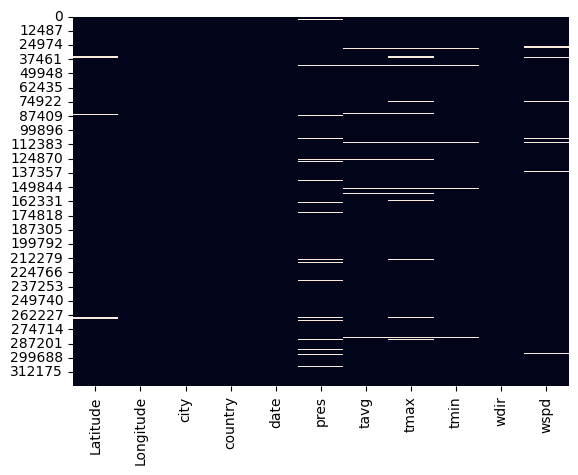

In [16]:
# Mostar mapa de calor para identificar los valores atípicos
sns.heatmap(df_outliers, cbar=False)

Represento los datos en diferentes formas de visualizacion de agrupamiento

In [18]:
df.groupby('city')['country'].count()

city
Abu Dhabi       1745
Accra           1745
Adamstown       1543
Algiers         1745
Alofi           1704
                ... 
Willemstad      1745
Willemstad      1745
Yamoussoukro    1745
Yaren           1544
Zagreb          1745
Name: country, Length: 192, dtype: int64

In [19]:
print("Maxima fecha")
df['date'].max()

Maxima fecha


'31-12-2021'

In [20]:
print("Minima fecha")
df['date'].min()

Minima fecha


'01-01-2018'

Podemos concluir que se analizo el archivo daily_weather_data.csv al realizar un proceso de Data Mining de manera exitosa. 
 - Se comprobo el tipo de atributos e informacion general. 
 - Se analizo datos faltantes, en este caso no se encontraron coincidencias, por lo tanto no pudimos agrupar nada. 
 - Se analizo datos atipicos de los cuales hubo coincidencias y se analizo con el rango intercuartil, posteriormente se grafico. 
 - Se utilizaron varias operaciones de agrupamiento como count() y max() - min().

 Archivo analizado correctamente. 